# **Data Cleaning & Feature Engineering**

## Objectives

* Clean and prepare the dataset
* Split the dataset into respective train and test sets for Outcome of Diabetic and Non-Diabetic
* Impute zero values with the median
* Standardise the data ready for training the ML model
* Select the feature engineering method for use in the ML pipeline using the train test datasets

## Inputs

* outputs/datasets/collection/diabetes.csv

## Outputs

* Cleaned dataset will be generated for Train and Test sets and will be exported to outputs/datasets/cleaned folder
    * outputs/datasets/cleaned/x_train_cleaned.csv
    * outputs/datasets/cleaned/y_train_cleaned.csv
    * outputs/datasets/cleaned/x_test_cleaned.csv
    * outputs/datasets/cleaned/y_test_cleaned.csv

## Additional Comments

* This Notebook falls under the CRISP-DM of Data Preperation.
* The conclusions of this notebook is that we have a Cleaned Data Pipeline ready for the model and have split the dataset into train and test sets.
* Due to the overlap between the data cleaning and feature engineering portions of the pipeline, it was decided that one notebook was best used to incorporate both the Data Cleaning and the Feature engineering processes.


---

# Change working directory

* As the notebooks are stored in the subfolder 'jupyter_notebooks' we therefore, when running the notebook in the editor, need to change the working directory.

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/pp5-diabetes-prediction/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/pp5-diabetes-prediction'

# Importing the Libraries

* Here we will import the dependencies used during the Correlation Study phase.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Loading Collected Dataset

* We will begin by loading the diabetes dataset.

* A Pandas dataframe is declared using the diabetes dataset using `read_csv()`

* The first fifteen rows will be displayed using `head()` to get a broader view of the data that will need cleaning

In [5]:
import pandas as pd
df = pd.read_csv(f"outputs/datasets/collection/diabetes.csv")
df.head(15)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


---

# Zero Value Data

* We identified previously that some variables had some abnormalities with zero values, this is likely due to missing values being represented as zeros in the original source data.

* These zero values will either need to be removed from the dataset or replaced and added by imputing with a median value. As the dataset is already small, imputing will be opted for in this stage of cleaning the data.

* External code was taken from [towardsdatascience](https://towardsdatascience.com/pima-indian-diabetes-prediction-7573698bd5fe) for guidance with replacing zero values and was then customised to be appropriate for our dataset.

In [6]:
# BloodPressure

df1 = df.loc[df['Outcome'] == 1]
df2 = df.loc[df['Outcome'] == 0]
df1 = df1.replace({'BloodPressure':0}, np.median(df1['BloodPressure']))
df2 = df2.replace({'BloodPressure':0}, np.median(df2['BloodPressure']))
dataframe = [df1, df2]
df = pd.concat(dataframe)

* Zero values will now be replaced for 1 (Diabetic) with a median of 1 and this will also be true for 0 (Non-Diabetic) when it comes to the Outcome variable using NumPy's median function.

* We need to apply the same code for each variable where there is an abnormal occurance.

In [7]:
# BMI

df1 = df.loc[df['Outcome'] == 1]
df2 = df.loc[df['Outcome'] == 0]
df1 = df1.replace({'BMI':0}, np.median(df1['BMI']))
df2 = df2.replace({'BMI':0}, np.median(df2['BMI']))
dataframe = [df1, df2]
df = pd.concat(dataframe)

In [8]:
# Insulin

df1 = df.loc[df['Outcome'] == 1]
df2 = df.loc[df['Outcome'] == 0]
df1 = df1.replace({'Insulin':0}, np.median(df1['Insulin']))
df2 = df2.replace({'Insulin':0}, np.median(df2['Insulin']))
dataframe = [df1, df2]
df = pd.concat(dataframe)

In [9]:
# SkinThickness

df1 = df.loc[df['Outcome'] == 1]
df2 = df.loc[df['Outcome'] == 0]
df1 = df1.replace({'SkinThickness':0}, np.median(df1['SkinThickness']))
df2 = df2.replace({'SkinThickness':0}, np.median(df2['SkinThickness']))
dataframe = [df1, df2]
df = pd.concat(dataframe)

In [10]:
# Glucose
df1 = df.loc[df['Outcome'] == 1]
df2 = df.loc[df['Outcome'] == 0]
df1 = df1.replace({'Glucose':0}, np.median(df1['Glucose']))
df2 = df2.replace({'Glucose':0}, np.median(df2['Glucose']))
dataframe = [df1, df2]
df = pd.concat(dataframe)

* We can test that the above changes have been made by running the function `head()` to get a list of the first fifteen rows again to see what the new median data will be.

In [11]:
df.head(15)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.60,0.627,50,1
2,8,183,64,27,0,23.30,0.672,32,1
4,0,137,40,35,168,43.10,2.288,33,1
6,3,78,50,32,88,31.00,0.248,26,1
8,2,197,70,45,543,30.50,0.158,53,1
9,8,125,96,27,0,34.25,0.232,54,1
11,10,168,74,27,0,38.00,0.537,34,1
13,1,189,60,23,846,30.10,0.398,59,1
14,5,166,72,19,175,25.80,0.587,51,1
15,7,100,74,27,0,30.00,0.484,32,1


* After cleaning the data we can see that Insulin still has zero values for the median for Diabetics (Outcome 1). From this we hypothesise that Insulin for Diabetics is lower than that of non-diabetics.

* Next we want to group the diabetes dataset by mean for the Outcome as this is what the machine learning algorithm will see.

In [12]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,110.622000,70.844000,25.502000,87.200000,30.845100,0.429734,31.190000
1,4.865672,142.302239,75.242537,31.029851,100.335821,35.398134,0.550500,37.067164


* We then want to separate the variables data from the Outcome label by dropping the Outcome column using the `drop()` function.

In [13]:
x = df.drop(columns = 'Outcome', axis=1)
y = df['Outcome']

In [14]:
print(x)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
2              8      183             64             27        0  23.3   
4              0      137             40             35      168  43.1   
6              3       78             50             32       88  31.0   
8              2      197             70             45      543  30.5   
..           ...      ...            ...            ...      ...   ...   
762            9       89             62             21       39  22.5   
763           10      101             76             48      180  32.9   
764            2      122             70             27       39  36.8   
765            5      121             72             23      112  26.2   
767            1       93             70             31       39  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
2                       0.672   32  


* As we can see we have successfully separated the Outcome column as it is no longer showing with the rest of the dataset when printing 'x'.

In [15]:
print(y)

0      1
2      1
4      1
6      1
8      1
      ..
762    0
763    0
764    0
765    0
767    0
Name: Outcome, Length: 768, dtype: int64


* Next we want to standardise the data to make it easier for the machine learning model to predict the outcome.

## Data Standardisation

In [16]:
df_scaler = StandardScaler()

* We use `fit()` and `transform()` to take the training data as an argument and compute the mean and standard deviation to be used for further scaling.

In [17]:
df_scaler.fit(x)
stnd_data = df_scaler.transform(x)
print(stnd_data)

[[ 0.63994726  0.86462486 -0.0313235  ...  0.16958256  0.46849198
   1.4259954 ]
 [ 1.23388019  2.01426457 -0.69266918 ... -1.3283415   0.60439732
  -0.10558415]
 [-1.14185152  0.50330953 -2.67670622 ...  1.551163    5.4849091
  -0.0204964 ]
 ...
 [-0.54791859  0.01060679 -0.19665992 ...  0.63495703 -0.39828208
  -0.53102292]
 [ 0.3429808  -0.02224005 -0.0313235  ... -0.90659589 -0.68519336
  -0.27575966]
 [-0.84488505 -0.94195182 -0.19665992 ... -0.2957919  -0.47378505
  -0.87137393]]


* We will use the variables 'x' and 'y' for training our machine learning model. 'x' represents the data and 'y' represents the model.

In [18]:
x = stnd_data
y = df['Outcome']
print(x)
print(y)

[[ 0.63994726  0.86462486 -0.0313235  ...  0.16958256  0.46849198
   1.4259954 ]
 [ 1.23388019  2.01426457 -0.69266918 ... -1.3283415   0.60439732
  -0.10558415]
 [-1.14185152  0.50330953 -2.67670622 ...  1.551163    5.4849091
  -0.0204964 ]
 ...
 [-0.54791859  0.01060679 -0.19665992 ...  0.63495703 -0.39828208
  -0.53102292]
 [ 0.3429808  -0.02224005 -0.0313235  ... -0.90659589 -0.68519336
  -0.27575966]
 [-0.84488505 -0.94195182 -0.19665992 ... -0.2957919  -0.47378505
  -0.87137393]]
0      1
2      1
4      1
6      1
8      1
      ..
762    0
763    0
764    0
765    0
767    0
Name: Outcome, Length: 768, dtype: int64


* As we can see above, scikit-learn strips the column labels from our data when converting to a numpy ndarray for standardising the data. Whilst this is fine at this current stage, in case we need to manipulate the data further down the line, this can make things confusing. We will need to add the column labels back on for ease of interpretation.

In [19]:
x_col = df.columns[0:-1]
print(x_col)


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')


* As you can see above, these are the original column labels that we can include back into our dataset and assign to a variable of 'x_labels' to refer to at any point later on when identifying what columns the values relate to. We will achieve this using the following code where the solution was found for guidance from [Stackoverflow](https://stackoverflow.com/questions/29586323/how-to-retain-column-headers-of-data-frame-after-pre-processing-in-scikit-learn)

In [20]:
x_labels = pd.DataFrame(x, columns = x_col)
print(x_labels)

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.639947  0.864625      -0.031324       0.812528 -0.849452  0.169583   
1       1.233880  2.014265      -0.692669      -0.046266 -0.849452 -1.328341   
2      -1.141852  0.503310      -2.676706       0.812528  0.705374  1.551163   
3      -0.250952 -1.434655      -1.850024       0.490480 -0.035019 -0.208534   
4      -0.547919  2.474120      -0.196660       1.886020  4.175966 -0.281249   
..           ...       ...            ...            ...       ...       ...   
763     1.530847 -1.073339      -0.858006      -0.690362 -0.488510 -1.444685   
764     1.827813 -0.679177       0.299349       2.208068  0.816433  0.067782   
765    -0.547919  0.010607      -0.196660      -0.046266 -0.488510  0.634957   
766     0.342981 -0.022240      -0.031324      -0.475663  0.187099 -0.906596   
767    -0.844885 -0.941952      -0.196660       0.383131 -0.488510 -0.295792   

     DiabetesPedigreeFunction       Age

* We have now converted the x matrix back to a pandas dataframe and included the original column labels ready to be split into the respective train and test sets.

---

## Train Test Split

* Next we will need to split the cleaned data into the train and test sets.
* The x variable data will be split into two arrays which are x_train and x_test.
* The test size will be 20% of the dataset and the train size will be 80% of the dataset. As the dataset is small, we want to maximise the amount of trained data to better improve the model whilst also being mindful of overfitting the model.

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x_labels, y, test_size = 0.2, stratify=y, random_state=2)
print(f"Total Records: {x.shape} \nx_train set: {x_train.shape} \nx_test set: {x_test.shape}")


Total Records: (768, 8) 
x_train set: (614, 8) 
x_test set: (154, 8)


* From this, 768 is the number of records in our dataset with 614 records being used for training data leaving 154 records to be used for the test data.

* Next we need to move onto Feature Engineering and train the model.

---

# Pushing the clean files to Repository

* If you do not need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [22]:
try:
    # Creates cleaned folder in the outputs directory
    os.makedirs(name='outputs/datasets/cleaned')
except Exception as e:
    print(e)

[Errno 17] File exists: 'outputs/datasets/cleaned'


### Train Dataset

In [23]:
pd.DataFrame(x_train).to_csv("outputs/datasets/cleaned/x_train_cleaned.csv", index=False)

In [24]:
pd.DataFrame(y_train).to_csv("outputs/datasets/cleaned/y_train_cleaned.csv", index=False)

### Test Dataset

In [25]:
pd.DataFrame(x_test).to_csv("outputs/datasets/cleaned/x_test_cleaned.csv", index=False)

In [26]:
pd.DataFrame(y_test).to_csv("outputs/datasets/cleaned/y_test_cleaned.csv", index=False)

---

# Loading Train/Test Dataset

#### Train Set

In [27]:
import pandas as pd

x_train_path = "outputs/datasets/cleaned/x_train_cleaned.csv"
x_train = pd.read_csv(x_train_path)

x_train.head(15)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-1.141852,-0.087934,0.134013,-0.046266,-0.849452,-0.004933,-0.999286,-0.786286
1,0.639947,-0.547790,-0.196660,0.490480,-0.220117,-0.237620,-1.056668,0.319855
2,-0.844885,2.211346,-1.023342,-0.475663,6.980205,-0.339421,-0.223115,2.191785
3,-0.547919,-0.547790,0.630022,1.886020,0.918237,0.184126,0.722182,-0.360847
4,-1.141852,1.915724,-0.527333,1.241924,-0.849452,1.391191,4.291962,-0.701198
5,-0.547919,0.207688,0.464686,1.027226,0.834943,1.580249,2.271503,-0.190672
6,-0.547919,0.010607,-0.196660,-0.046266,-0.488510,0.634957,-0.398282,-0.531023
7,1.233880,-0.055087,0.134013,-0.046266,-0.849452,-0.353964,-0.872441,0.404942
8,1.233880,-1.007646,0.795359,-0.690362,-0.488510,0.460442,0.347687,2.957575
9,-0.547919,-0.777718,-1.023342,-1.119759,0.261138,0.329555,-0.827139,-0.956462


In [28]:
y_train_path = "outputs/datasets/cleaned/y_train_cleaned.csv"
y_train = pd.read_csv(y_train_path)

y_train.head()

,Outcome
0,1
1,0
2,1
3,1
4,1


#### Test Set

In [29]:
x_test_path = "outputs/datasets/cleaned/x_test_cleaned.csv"
x_test = pd.read_csv(x_test_path)

x_test.head(15)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.250952,-0.514943,-0.031324,-0.690362,-0.488510,-0.964768,-0.799958,-0.531023
1,-0.250952,-0.285015,-2.346033,-1.549156,-0.488510,-1.459228,-1.002306,-0.956462
2,0.342981,0.831778,0.464686,-0.690362,-0.488510,0.184126,-0.766737,2.702312
3,-0.250952,1.587256,-0.692669,1.027226,1.232904,0.300469,-0.349960,-0.275760
4,-0.250952,-1.237573,-0.031324,0.490480,-0.488510,0.693129,-0.618751,-0.445935
5,-0.844885,-1.139033,-1.023342,1.027226,-0.155333,0.693129,0.112118,-0.956462
6,-1.141852,0.569003,-0.858006,-1.119759,1.094080,-1.502857,-0.799958,-1.041549
7,2.718712,0.240535,0.134013,0.275781,-0.849452,1.085789,0.293325,0.915469
8,0.639947,-0.777718,-1.188678,0.597829,0.908982,0.227754,-0.126471,0.830381
9,0.639947,0.404769,-0.196660,-0.475663,0.353687,0.431356,0.211782,-0.360847


In [30]:
y_test_path = "outputs/datasets/cleaned/y_test_cleaned.csv"
y_test = pd.read_csv(y_test_path)

y_test.head()

,Outcome
0,0
1,0
2,0
3,1
4,0


---

## Data Exploration

* Further exploration of the Train/Test datasets will be required to establish whether there are any further potential transformations with the variables

In [31]:
pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.


#### Train Set

In [32]:
from pandas_profiling import ProfileReport

profile_pandas = ProfileReport(df=x_train, minimal=True)
profile_pandas.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

* The pandas report confirms to us that all the data has been standardised in the previous steps and there are no longer any abnormal zero values in our train dataset.

* Next we will carry out further visualisation for both the train set features

#### Visualisation for Train Set features

* Comparing the Train set 'Outcome' count for 0 --> Non-diabetic and 1 --> Diabetic.

<AxesSubplot:xlabel='Outcome', ylabel='count'>

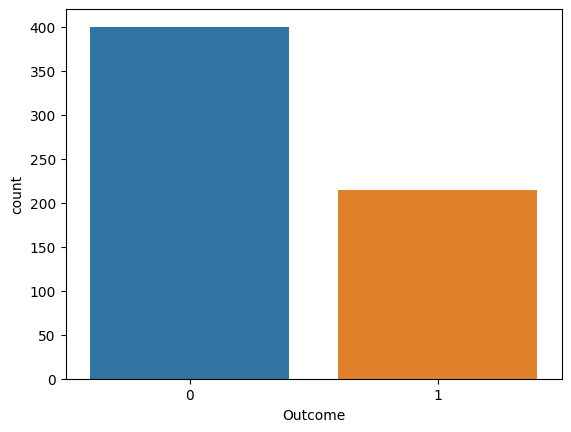

In [33]:
%matplotlib inline

sns.countplot(x=y_train['Outcome'])

<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

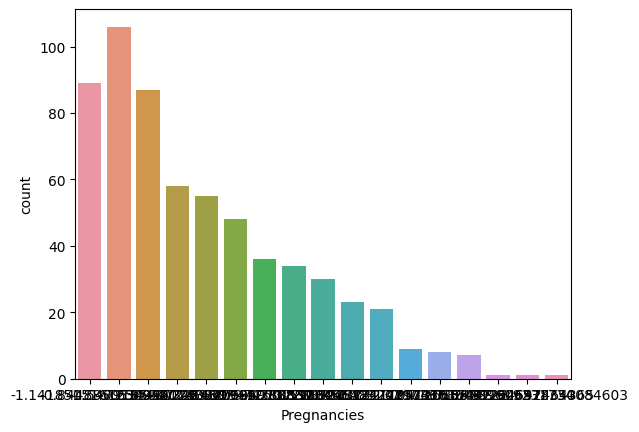

In [34]:
sns.countplot(x=x_train['Pregnancies'])

<AxesSubplot:xlabel='Glucose'>

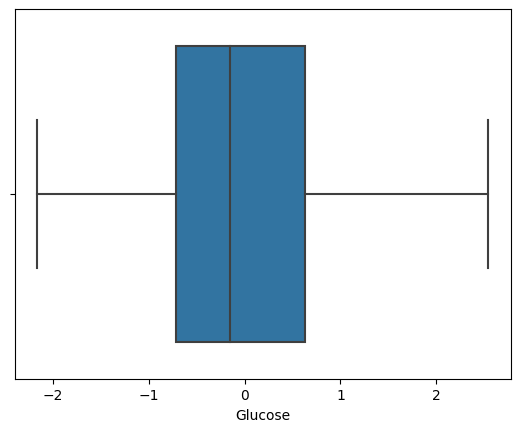

In [35]:
sns.boxplot(x=x_train['Glucose'])

<AxesSubplot:xlabel='BloodPressure'>

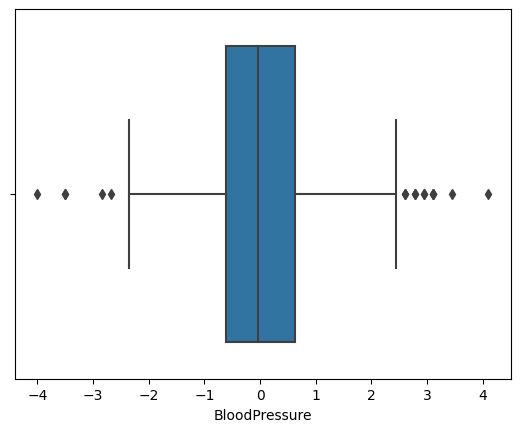

In [36]:
sns.boxplot(x=x_train['BloodPressure'])

<AxesSubplot:xlabel='SkinThickness'>

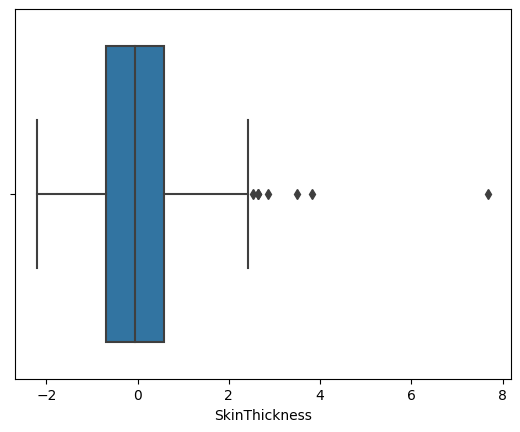

In [37]:
sns.boxplot(x=x_train['SkinThickness'])

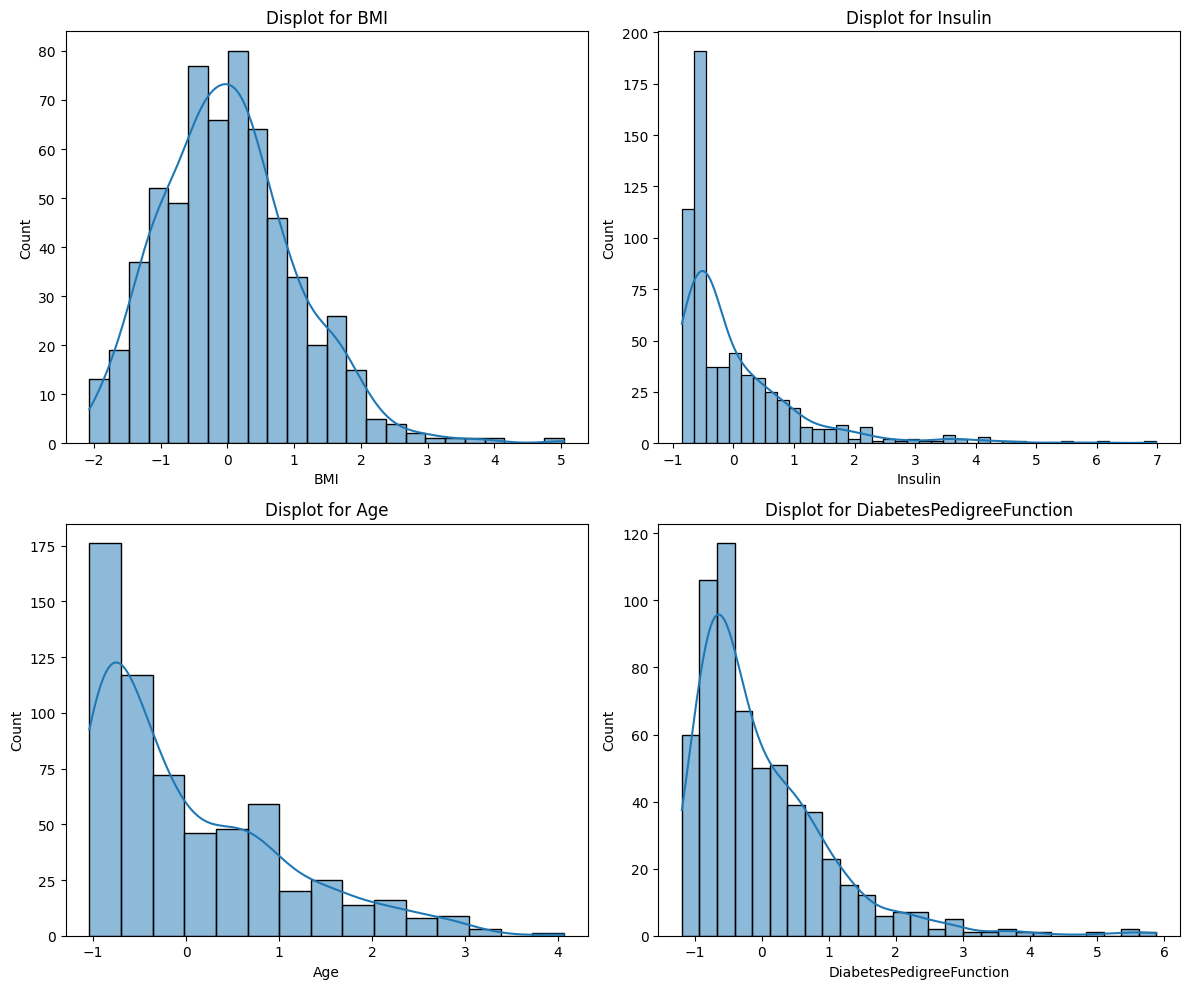

In [38]:
displot_col = [
    'BMI', 'Insulin', 'Age', 'DiabetesPedigreeFunction'
    ]
plt.figure(figsize=(12,10))

for i in range(len(displot_col)):
    plt.subplot(2,2, i+1)
    sns.histplot(x = x_train[displot_col[i]], kde=True)
    plt.title('Displot for {}' .format(displot_col[i]))
    plt.tight_layout()

* Next we will investigate the correlation again, this time for the train set feature sets. Variables within a dataset can be related to one another for a variety of reasons. It is useful then to better understand any relationships between variables when analysing data and modeling.

In [39]:
x_train.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.135909,0.219355,0.040129,-0.074011,0.017659,-0.053351,0.542901
Glucose,0.135909,1.000000,0.224095,0.226073,0.307994,0.231330,0.141413,0.281326
BloodPressure,0.219355,0.224095,1.000000,0.159907,-0.046309,0.278476,-0.004368,0.318546
SkinThickness,0.040129,0.226073,0.159907,1.000000,0.203899,0.572977,0.182354,0.077890
Insulin,-0.074011,0.307994,-0.046309,0.203899,1.000000,0.159173,0.173923,-0.016894
BMI,0.017659,0.231330,0.278476,0.572977,0.159173,1.000000,0.143420,0.017044
DiabetesPedigreeFunction,-0.053351,0.141413,-0.004368,0.182354,0.173923,0.143420,1.000000,0.022701
Age,0.542901,0.281326,0.318546,0.077890,-0.016894,0.017044,0.022701,1.000000


* This can be further visualised as a heatmap

<AxesSubplot:>

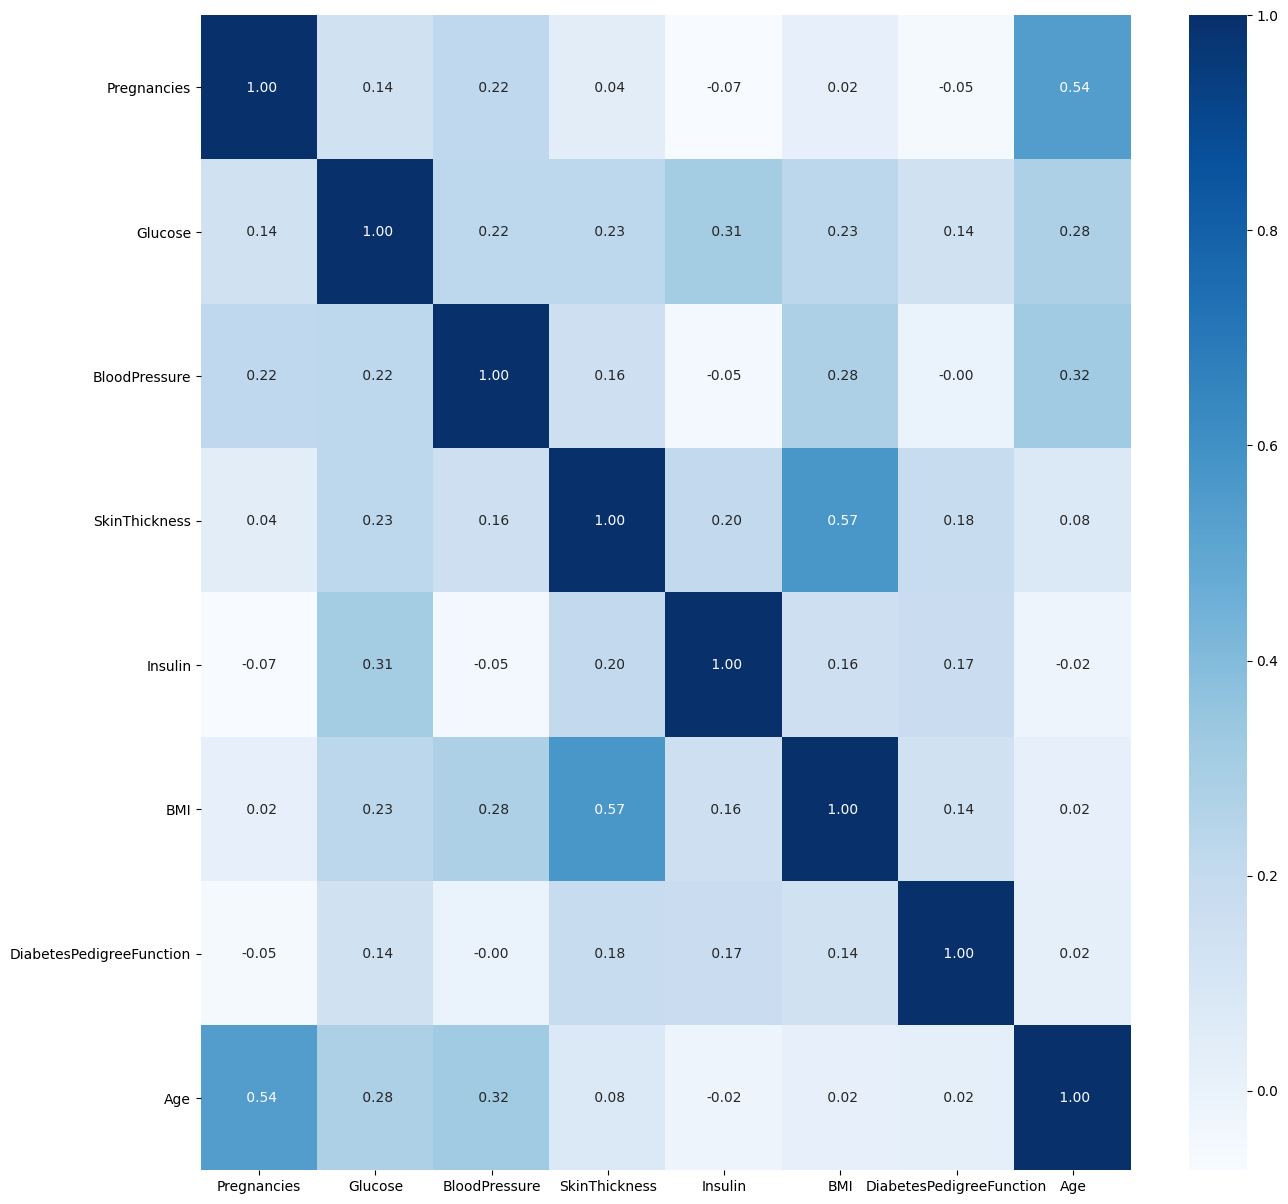

In [40]:
plt.figure(figsize=(15,15))
correl = x_train.corr()
sns.heatmap(correl, annot=True, cmap=plt.cm.Blues, fmt=' .2f')

* As expected there is a strong correlation between the two variables of Age and Pregnancies as well as BMI and Skin Thickness. From this heatmap we can also determine that The Diabetes Pedigree Function which is the likeliness of diabetes based on family history has a strong relationship with Glucose levels.

#### Test Set 

In [41]:
from pandas_profiling import ProfileReport

profile_pandas = ProfileReport(df=x_train, minimal=True)
profile_pandas.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### Visualisation for Test Set features

* Comparing the Test set 'Outcome' count for 0 --> Non-diabetic and 1 --> Diabetic.

<AxesSubplot:xlabel='Outcome', ylabel='count'>

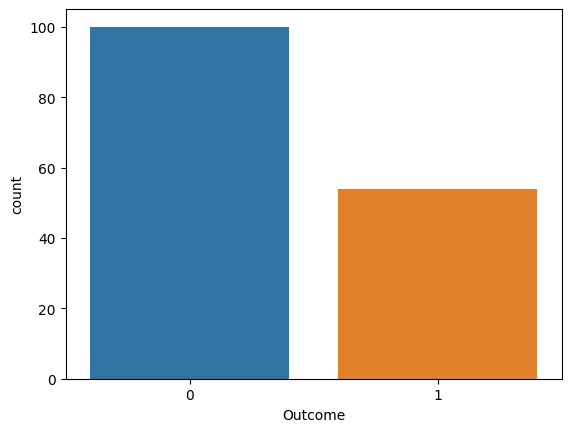

In [42]:
%matplotlib inline

sns.countplot(x=y_test['Outcome'])

<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

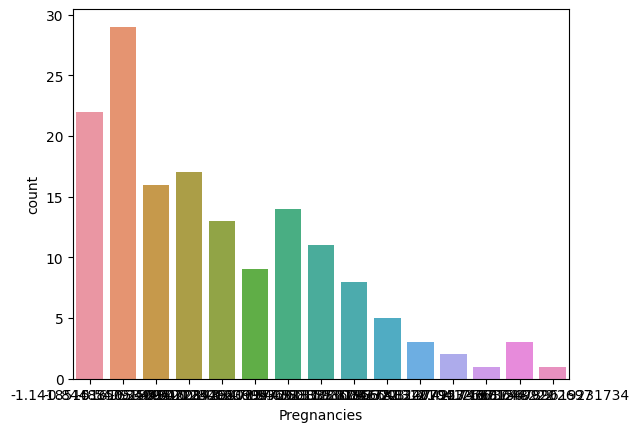

In [43]:
sns.countplot(x=x_test['Pregnancies'])

<AxesSubplot:xlabel='Glucose'>

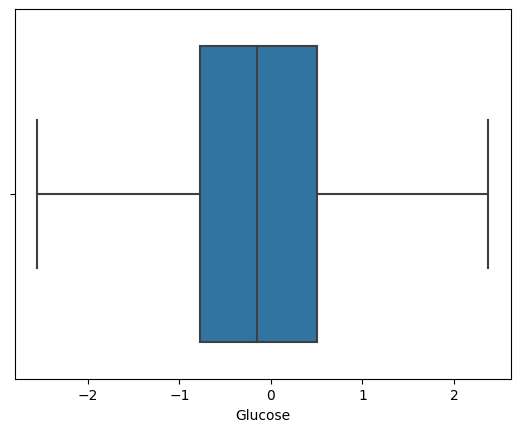

In [44]:
sns.boxplot(x=x_test['Glucose'])

<AxesSubplot:xlabel='BloodPressure'>

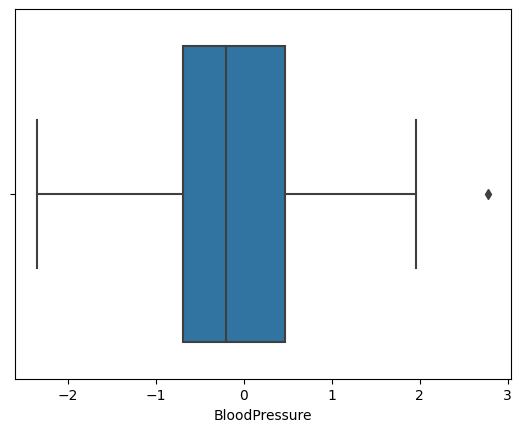

In [45]:
sns.boxplot(x=x_test['BloodPressure'])

<AxesSubplot:xlabel='SkinThickness'>

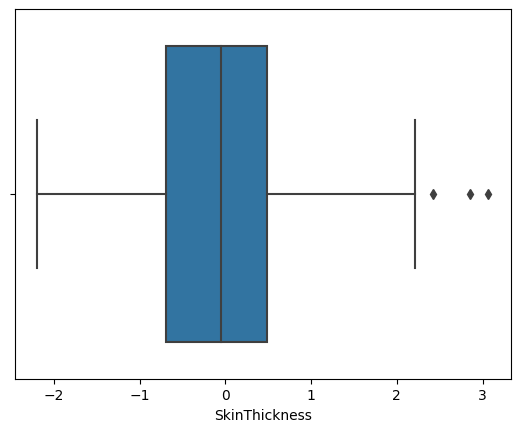

In [46]:
sns.boxplot(x=x_test['SkinThickness'])

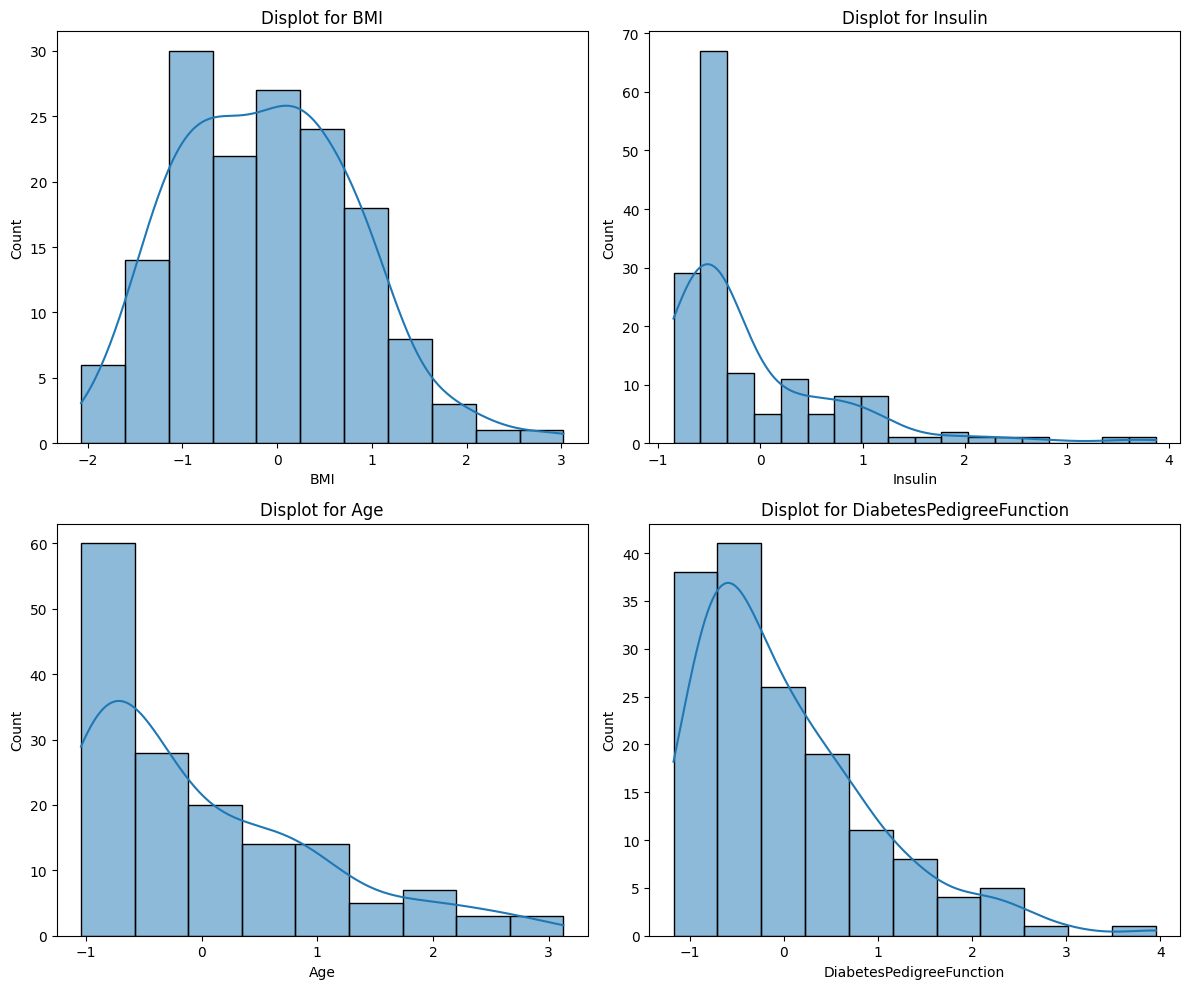

In [47]:
displot_col = [
    'BMI', 'Insulin', 'Age', 'DiabetesPedigreeFunction'
    ]
plt.figure(figsize=(12,10))

for i in range(len(displot_col)):
    plt.subplot(2,2, i+1)
    sns.histplot(x = x_test[displot_col[i]], kde=True)
    plt.title('Displot for {}' .format(displot_col[i]))
    plt.tight_layout()

* Next we will investigate the correlation, this time for the test set feature sets. Variables within a dataset can be related to one another for a variety of reasons. It is useful then to better understand any relationships between variables when analysing data and modeling.

In [48]:
x_test.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.107220,0.168096,0.065243,-0.077655,0.052445,0.051672,0.550230
Glucose,0.107220,1.000000,0.220929,0.163727,0.312884,0.252366,0.126840,0.218625
BloodPressure,0.168096,0.220929,1.000000,0.148574,-0.047613,0.307344,0.016657,0.359496
SkinThickness,0.065243,0.163727,0.148574,1.000000,0.200309,0.570939,-0.030660,0.002588
Insulin,-0.077655,0.312884,-0.047613,0.200309,1.000000,0.134377,0.128340,-0.116659
BMI,0.052445,0.252366,0.307344,0.570939,0.134377,1.000000,0.200510,0.074035
DiabetesPedigreeFunction,0.051672,0.126840,0.016657,-0.030660,0.128340,0.200510,1.000000,0.079926
Age,0.550230,0.218625,0.359496,0.002588,-0.116659,0.074035,0.079926,1.000000


* Further visualised below in a heatmap we can get a clearer idea for the above correlations

<AxesSubplot:>

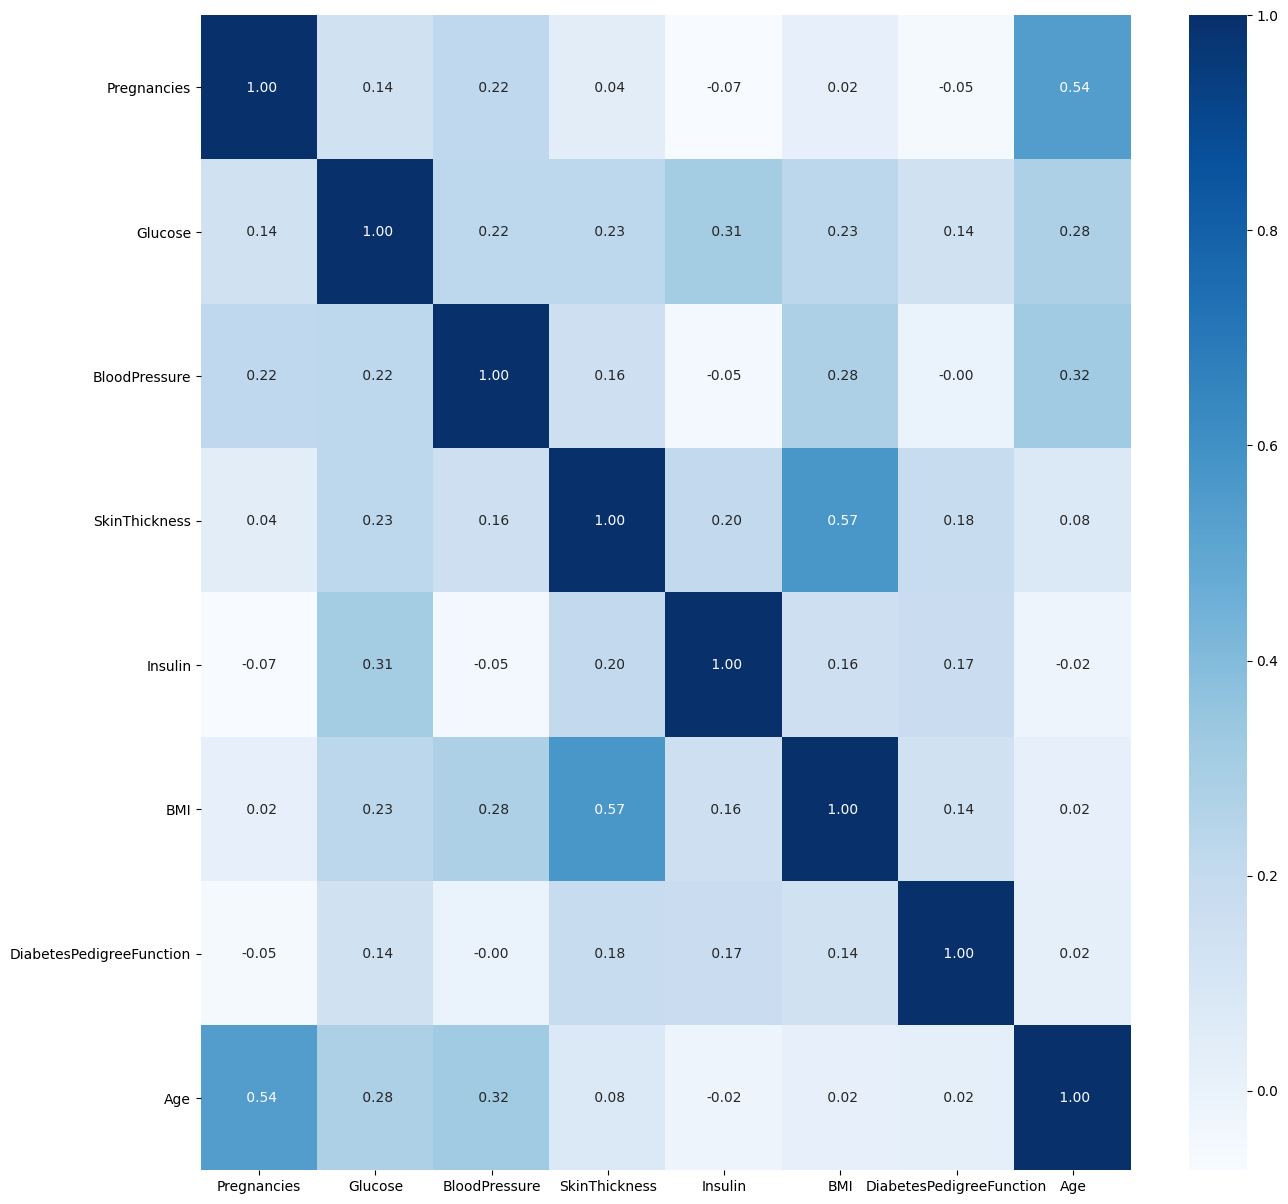

In [49]:
plt.figure(figsize=(15,15))
correl = x_train.corr()
sns.heatmap(correl, annot=True, cmap=plt.cm.Blues, fmt=' .2f')

* Just as there was with the train set, there is a strong correlation between the two variables of Age and Pregnancies as well as BMI and Skin Thickness. From this heatmap we can also determine that The Diabetes Pedigree Function which is the likeliness of diabetes based on family history has a strong relationship with Glucose levels.

### Power Predictive Score Analysis and Heatmap Correlation

* Another way to investigate the correlation between feature sets in our Train set data is by carrying out a Power Predictive Score Analysis and displaying via a heatmap. The below code was taken from Code Institutes Churnometer walkthrough project, specifically the Data Cleaning notebook. The functions were adapted and customised further to our requirements. Please see credit section in README.md.

         count   mean    std  min  25%  50%  75%    max
ppscore   56.0  0.013  0.047  0.0  0.0  0.0  0.0  0.231


Spearman Correlation Heatmap
This heatmap displays and evaluates the monotonic relationship of variables 



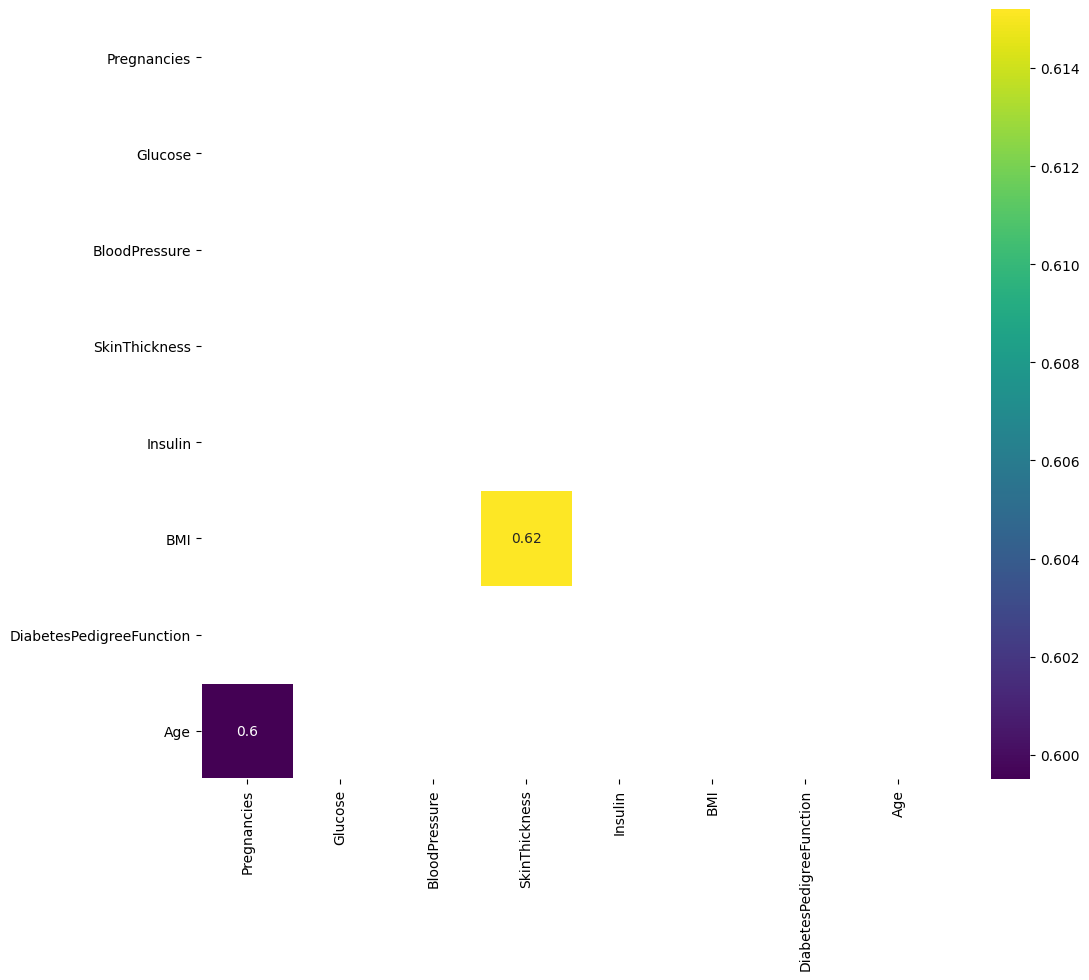



Pearson Correlation Heatmap
Displays and evaluates the linear relationship between two continuous variables



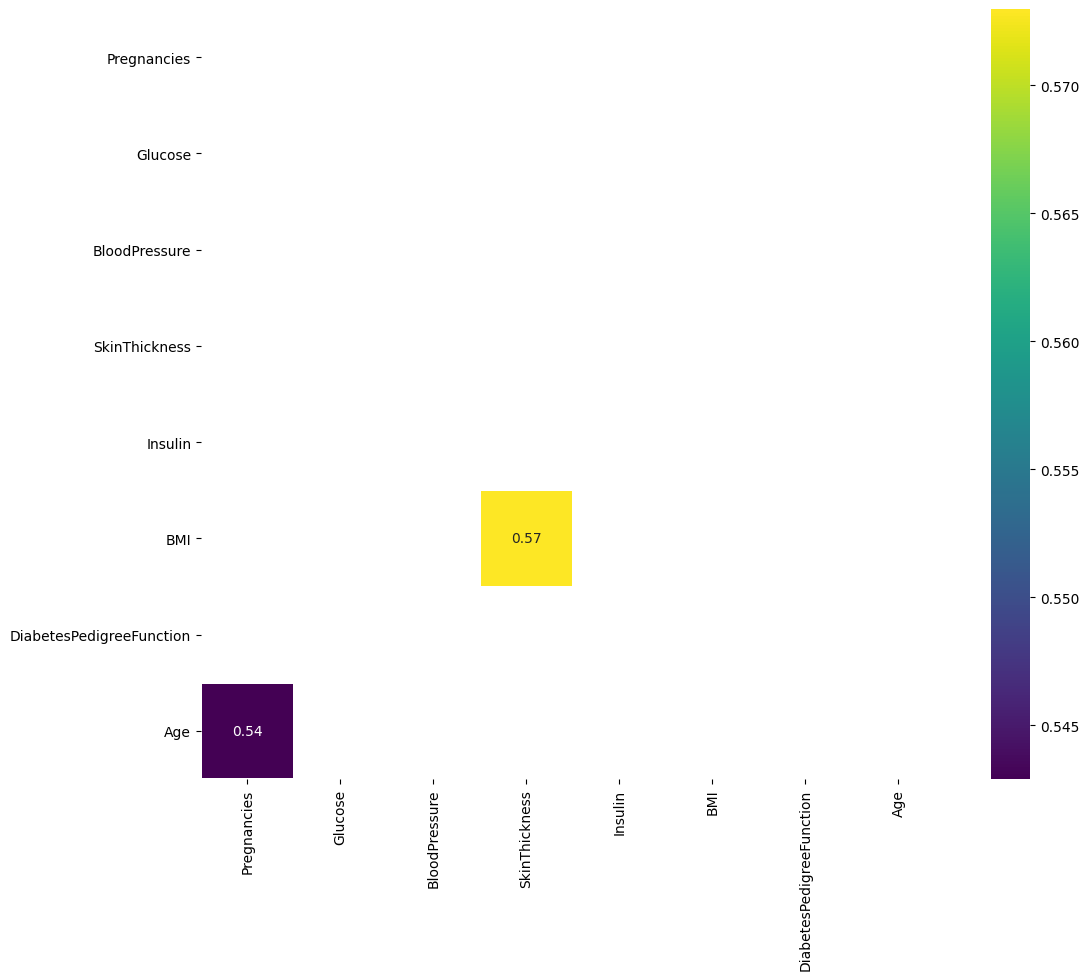



Power Predictive Score Heatmap
The Power Predictive Score detects linear or non-linear relationships between two columns.
The score has a range of 0 (no predictive power) and 1 (perfect predictive power)


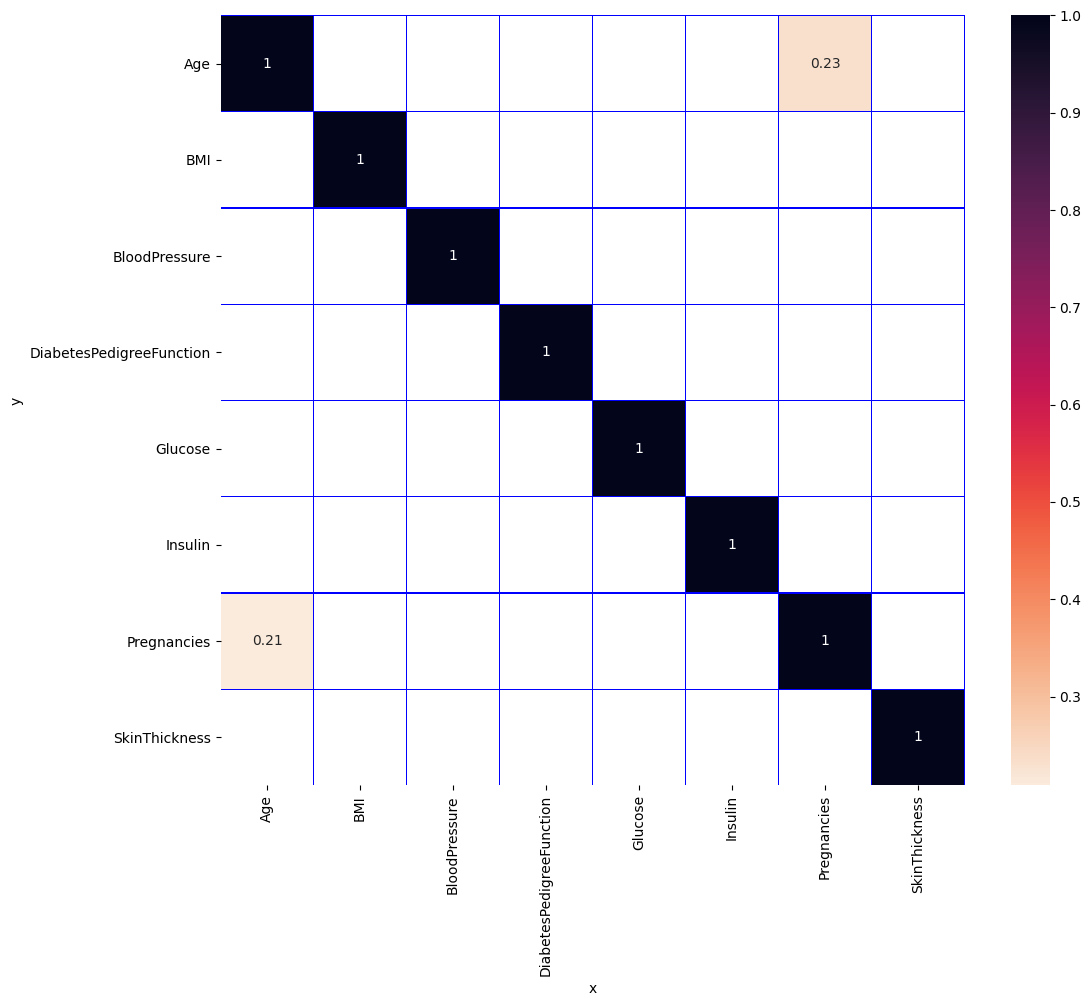

In [50]:
import ppscore as pps
import warnings
warnings.filterwarnings('ignore')

def heatmap_corr(x_train, threshold, figsize=(20, 12), font_annot=8):
    if len(x_train.columns) > 1:
        mask = np.zeros_like(x_train, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True
        mask[abs(x_train) < threshold] = True

    fig, axes = plt.subplots(figsize=figsize)
    sns.heatmap(x_train, annot=True, xticklabels=True, yticklabels=True,
                mask=mask, cmap='viridis', annot_kws={"size": font_annot},
                ax=axes,
                linewidth=0.5
                )
    axes.set_yticklabels(x_train.columns, rotation=0)
    plt.ylim(len(x_train.columns), 0)
    plt.show()

def heatmap_pps(x_train, threshold, figsize=(20, 12), font_annot=8):
    if len(x_train.columns) > 1:
        mask = np.zeros_like(x_train, dtype=np.bool)
        mask[abs(x_train) < threshold] = True
        fig, ax = plt.subplots(figsize=figsize)
        ax = sns.heatmap(
            x_train, annot=True, xticklabels=True, yticklabels=True,
            mask=mask, cmap='rocket_r',
            annot_kws={"size": font_annot},
            linewidth=0.05, linecolor='blue'
        )
        plt.ylim(len(x_train.columns), 0)
        plt.show()

def CalculateCorrAndPPS(x_train):
    df_corr_spearman = x_train.corr(method="spearman")
    df_corr_pearson = x_train.corr(method="pearson")

    pps_matrix_raw = pps.matrix(x_train)
    pps_matrix = (pps_matrix_raw.filter(['x', 'y', 'ppscore'])
                  .pivot(columns='x', index='y', values='ppscore')
                  )

    pps_score_stats = (pps_matrix_raw.query("ppscore < 1").filter(['ppscore'])
                       .describe().T)
    print(pps_score_stats.round(3))

    return df_corr_pearson, df_corr_spearman, pps_matrix


def DisplayCorrAndPPS(df_corr_pearson, df_corr_spearman, pps_matrix,
                      CorrThreshold, PPS_Threshold,
                      figsize=(20, 12), font_annot=8):

    print("\n")
    print("Spearman Correlation Heatmap")
    print("This heatmap displays and evaluates the monotonic relationship of variables \n")
    heatmap_corr(x_train=df_corr_spearman, threshold=CorrThreshold, figsize=figsize,
                 font_annot=font_annot)

    print("\n")
    print("Pearson Correlation Heatmap")
    print("Displays and evaluates the linear relationship between two continuous variables\n")
    heatmap_corr(x_train=df_corr_pearson, threshold=CorrThreshold,
                 figsize=figsize, font_annot=font_annot)

    print("\n")
    print("Power Predictive Score Heatmap")
    print(f"The Power Predictive Score detects linear or non-linear relationships between two columns.\n"
          f"The score has a range of 0 (no predictive power) and 1 (perfect predictive power)")
    heatmap_pps(x_train=pps_matrix, threshold=PPS_Threshold, figsize=figsize,
                font_annot=font_annot)


df_corr_pearson, df_corr_spearman, pps_matrix = CalculateCorrAndPPS(x_train)

DisplayCorrAndPPS(df_corr_pearson=df_corr_pearson,
                  df_corr_spearman=df_corr_spearman,
                  pps_matrix=pps_matrix,
                  CorrThreshold=0.4, PPS_Threshold=0.2,
                  figsize=(12, 10), font_annot=10)

* The above analysis is comparing the correlation between variables and doesn't include our target variable of Outcome, which we had correlated previously. The PPS shows that the relationship between the variables alone without considering the Outcome marker does not give a clear indication of having a significant predictive score.

* Both Spearman and Pearsons corroborate the relationships between the age and pregnancies variable having a strong link as well as the link between Glucose levels and Diabetes Pedigree function. These variables could give a clue to having some affect on the outcome of a patient being diagnosed with diabetes

#### Quick Feature Engineering

* In order to carry out quick feature engineering relating to numerical variables for deciding which transformation to proceed with, a custom function will be created. Credit: Code Institutes Feature engine Unit 9: Custom Functions where the code has been taken and modified for the requirements of our datasets.

In [51]:
from feature_engine import transformation as vt
from feature_engine.outliers import Winsorizer
from feature_engine.encoding import OrdinalEncoder
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [52]:
def FeatureEngineeringAnalysis(df,analysis_type=None):


  """
  - used for quick feature engineering on numerical and categorical variables
  to decide which transformation can better transform the distribution shape 
  - Once transformed, use a reporting tool, like pandas-profiling, to evaluate distributions

  """
  check_missing_values(x_train)
  allowed_types= ['numerical', 'ordinal_encoder',  'outlier_winsorizer']
  check_user_entry_on_analysis_type(analysis_type, allowed_types)
  list_column_transformers = define_list_column_transformers(analysis_type)
  
  
  # Loop in each variable and engineer the data according to the analysis type
  df_feat_eng = pd.DataFrame([])
  for column in x_train.columns:
    # create additional columns (column_method) to apply the methods
    df_feat_eng = pd.concat([df_feat_eng, x_train[column]], axis=1)
    for method in list_column_transformers:
      df_feat_eng[f"{column}_{method}"] = x_train[column]
      
    # Apply transformers in respectives column_transformers
    df_feat_eng,list_applied_transformers = apply_transformers(analysis_type, df_feat_eng, column)

    # For each variable, assess how the transformations perform
    transformer_evaluation(column, list_applied_transformers, analysis_type, df_feat_eng)

  return df_feat_eng


def check_user_entry_on_analysis_type(analysis_type, allowed_types):
  ### Check analyis type
  if analysis_type == None:
    raise SystemExit(f"You should pass analysis_type parameter as one of the following options: {allowed_types}")
  if analysis_type not in allowed_types:
      raise SystemExit(f"analysis_type argument should be one of these options: {allowed_types}")

def check_missing_values(x_train):
  if x_train.isna().sum().sum() != 0:
    raise SystemExit(
        f"There is missing value in your dataset. Please handle that before getting into feature engineering.")



def define_list_column_transformers(analysis_type):
  ### Set suffix colummns acording to analysis_type
  if analysis_type=='numerical':
    list_column_transformers = ["log_e","log_10","reciprocal", "power","box_cox","yeo_johnson"]
  
  elif analysis_type=='ordinal_encoder':
    list_column_transformers = ["ordinal_encoder"]

  elif analysis_type=='outlier_winsorizer':
    list_column_transformers = ['iqr']

  return list_column_transformers



def apply_transformers(analysis_type, df_feat_eng, column):


  for col in df_feat_eng.select_dtypes(include='category').columns:
    df_feat_eng[col] = df_feat_eng[col].astype('object')


  if analysis_type=='numerical':
    df_feat_eng,list_applied_transformers = FeatEngineering_Numerical(df_feat_eng,column)
  
  elif analysis_type=='outlier_winsorizer':
    df_feat_eng,list_applied_transformers = FeatEngineering_OutlierWinsorizer(df_feat_eng,column)

  elif analysis_type=='ordinal_encoder':
    df_feat_eng,list_applied_transformers = FeatEngineering_CategoricalEncoder(df_feat_eng,column)

  return df_feat_eng,list_applied_transformers



def transformer_evaluation(column, list_applied_transformers, analysis_type, df_feat_eng):
  # For each variable, assess how the transformations perform
  print(f"* Variable Analyzed: {column}")
  print(f"* Applied transformation: {list_applied_transformers} \n")
  for col in [column] + list_applied_transformers:
    
    if analysis_type!='ordinal_encoder':
      DiagnosticPlots_Numerical(df_feat_eng, col)
    
    else:
      if col == column: 
        DiagnosticPlots_Categories(df_feat_eng, col)
      else:
        DiagnosticPlots_Numerical(df_feat_eng, col)

    print("\n")



def DiagnosticPlots_Categories(df_feat_eng, col):
  plt.figure(figsize=(4, 3))
  sns.countplot(data=df_feat_eng, x=col,palette=['#432371'],order = df_feat_eng[col].value_counts().index)
  plt.xticks(rotation=90) 
  plt.suptitle(f"{col}", fontsize=30,y=1.05)        
  plt.show()
  print("\n")



def DiagnosticPlots_Numerical(x_train, variable):
  fig, axes = plt.subplots(1, 3, figsize=(12, 4))
  sns.histplot(data=x_train, x=variable, kde=True,element="step",ax=axes[0]) 
  stats.probplot(x_train[variable], dist="norm", plot=axes[1])
  sns.boxplot(x=x_train[variable],ax=axes[2])
  
  axes[0].set_title('Histogram')
  axes[1].set_title('QQ Plot')
  axes[2].set_title('Boxplot')
  fig.suptitle(f"{variable}", fontsize=30,y=1.05)
  plt.tight_layout()
  plt.show()


def FeatEngineering_CategoricalEncoder(df_feat_eng,column):
  list_methods_worked = []
  try:  
    encoder= OrdinalEncoder(encoding_method='arbitrary', variables = [f"{column}_ordinal_encoder"])
    df_feat_eng = encoder.fit_transform(df_feat_eng)
    list_methods_worked.append(f"{column}_ordinal_encoder")
  
  except: 
    df_feat_eng.drop([f"{column}_ordinal_encoder"],axis=1,inplace=True)
    
  return df_feat_eng,list_methods_worked


def FeatEngineering_OutlierWinsorizer(df_feat_eng,column):
  list_methods_worked = []

  ### Winsorizer iqr
  try: 
    disc=Winsorizer(
        capping_method='iqr', tail='both', fold=1.5, variables = [f"{column}_iqr"])
    df_feat_eng = disc.fit_transform(df_feat_eng)
    list_methods_worked.append(f"{column}_iqr")
  except: 
    df_feat_eng.drop([f"{column}_iqr"],axis=1,inplace=True)


  return df_feat_eng,list_methods_worked




def FeatEngineering_Numerical(df_feat_eng,column):

  list_methods_worked = []

  ### LogTransformer base e
  try: 
    lt = vt.LogTransformer(variables = [f"{column}_log_e"])
    df_feat_eng = lt.fit_transform(df_feat_eng)
    list_methods_worked.append(f"{column}_log_e")
  except: 
    df_feat_eng.drop([f"{column}_log_e"],axis=1,inplace=True)

    ### LogTransformer base 10
  try: 
    lt = vt.LogTransformer(variables = [f"{column}_log_10"],base='10')
    df_feat_eng = lt.fit_transform(df_feat_eng)
    list_methods_worked.append(f"{column}_log_10")
  except: 
    df_feat_eng.drop([f"{column}_log_10"],axis=1,inplace=True)

  ### ReciprocalTransformer
  try:
    rt = vt.ReciprocalTransformer(variables = [f"{column}_reciprocal"])
    df_feat_eng =  rt.fit_transform(df_feat_eng)
    list_methods_worked.append(f"{column}_reciprocal")
  except:
    df_feat_eng.drop([f"{column}_reciprocal"],axis=1,inplace=True)

  ### PowerTransformer
  try:
    pt = vt.PowerTransformer(variables = [f"{column}_power"])
    df_feat_eng = pt.fit_transform(df_feat_eng)
    list_methods_worked.append(f"{column}_power")
  except:
    df_feat_eng.drop([f"{column}_power"],axis=1,inplace=True)

  ### BoxCoxTransformer
  try:
    bct = vt.BoxCoxTransformer(variables = [f"{column}_box_cox"])
    df_feat_eng = bct.fit_transform(df_feat_eng)
    list_methods_worked.append(f"{column}_box_cox")
  except:
    df_feat_eng.drop([f"{column}_box_cox"],axis=1,inplace=True)


  ### YeoJohnsonTransformer
  try:
    yjt = vt.YeoJohnsonTransformer(variables = [f"{column}_yeo_johnson"])
    df_feat_eng = yjt.fit_transform(df_feat_eng)
    list_methods_worked.append(f"{column}_yeo_johnson")
  except:
        df_feat_eng.drop([f"{column}_yeo_johnson"],axis=1,inplace=True)


  return df_feat_eng,list_methods_worked

#### Smart Correlation Selection


In [53]:
from feature_engine.selection import SmartCorrelatedSelection

x_train_engineering = x_train.copy()
x_train_engineering.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-1.141852,-0.087934,0.134013,-0.046266,-0.849452,-0.004933,-0.999286,-0.786286
1,0.639947,-0.547790,-0.196660,0.490480,-0.220117,-0.237620,-1.056668,0.319855
2,-0.844885,2.211346,-1.023342,-0.475663,6.980205,-0.339421,-0.223115,2.191785
3,-0.547919,-0.547790,0.630022,1.886020,0.918237,0.184126,0.722182,-0.360847
4,-1.141852,1.915724,-0.527333,1.241924,-0.849452,1.391191,4.291962,-0.701198


---

## Next Steps

* There was no additional files or modified dataframes to be pushed to the repo and had taken place earlier in this notebook.
* The following notebook will contain the creation of the Machine Learning pipeline and accuracy scores.